In [75]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created Jun 7, 2023 for TRIPs-Py library
"""
__authors__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com"

In [76]:
from select import select
from trips.decompositions import generalized_golub_kahan, arnoldi
import numpy as np
from scipy import linalg as la
from trips.parameter_selection.gcv import *
from trips.parameter_selection.discrepancy_principle import *

In [77]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created December 10, 2022 for TRIPs-Py library
"""
__author__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com"
import os,sys
sys.path.insert(0,'/Users/mirjetapasha/Documents/Research_Projects/TRIPSpy/TRIPSpy')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from trips.operators import *
##Specify the font
##Latex needs to be installed! If not installed, please comment the following 5 lines
# parameters = {'xtick.labelsize': 12, 'ytick.labelsize': 12,
#           'axes.titlesize': 18, 'axes.labelsize': 18, 'figure.titlesize': 14, 'legend.fontsize': 13}
# plt.rcParams.update(parameters)
import time
import numpy as np
import scipy as sp
import scipy.stats as sps
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astra
# import phantoms as phantom
from venv import create
import pylops
from scipy.ndimage import convolve
from scipy import sparse
from scipy.ndimage import convolve
import scipy.special as spe
from trips.testProblems import *
from trips.operators import *
from trips.solvers.gks import *
from trips.solvers.Tikhonov import *
from trips.solvers.tSVD import *

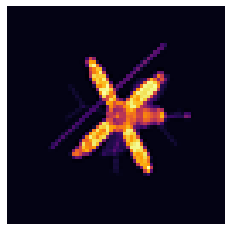

<Figure size 432x288 with 0 Axes>

In [78]:
# Deblurring example test problem
Deblur = Deblurring()
# In the class Deblurring we have can define the type of problem to be used.
generate_matrix = True #Defines a blurring operator where the forward operator matrix is formed explicitly
imagesize_x = 64 # Define the first dimension of the image
imagesize_y = 64 # Defines the second dimension of the image
spread = 1.5 # The PSF parameter
choose_image = 'satellite64' #The choice of the image
if generate_matrix == True:
        # spread = [2,2]
        size = imagesize_x
        shape = (size, size)
        spreadnew = (spread, spread)
        A = Deblur.forward_Op_matrix(spreadnew, shape, imagesize_x, imagesize_y)
x_true = Deblur.generate_true(choose_image)
b_true = Deblur.generate_data(x_true, generate_matrix)
(b, delta) = Deblur.add_noise(b_true, 'Gaussian', noise_level = 0.01)
Deblur.plot_rec(x_true.reshape((shape), order = 'F'), save_imgs = True, save_path='./saveImagesDeblurring'+'rec'+choose_image)

In [79]:
from pylops import Identity
L = Identity(imagesize_x*imagesize_x)
L.shape

(4096, 4096)

In [80]:
AAA = Identity(HH.shape[1])
(AAA*2).todense()

array([[2., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 2.]])

In [81]:
HH.T@HH  + reg_param*(Identity(HH.shape[1]).todense())

array([[ 1.85545237,  0.        ,  0.08578806,  0.08341413,  0.00932533],
       [ 0.        ,  1.90657593,  0.12469087,  0.14577662, -0.20347522],
       [ 0.08578806,  0.12469087,  1.48398047,  0.00836509,  0.07295743],
       [ 0.08341413,  0.14577662,  0.00836509,  1.54203332,  0.08740192],
       [ 0.00932533, -0.20347522,  0.07295743,  0.08740192,  1.50486025]])

In [29]:
HH.shape[1]

2

In [82]:
param_choice = 'manual'
reg_param = 1
projection_dim = 5
dp_stop = 0
b_vec = b.reshape((-1,1))
(V,H) = arnoldi(A, b_vec, projection_dim, dp_stop)
UU = V[:, 0:-1]
HH = H[0:-1, :]
bhat = UU.T.dot(b_vec)

generating basis...:   0%|          | 0/5 [00:00<?, ?it/s]

5


generating basis...: 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]


In [83]:
HH.shape

(4095, 5)

In [84]:
def arnoldi_1(A: 'np.ndarray[np.float]', n: int, q_0: 'np.ndarray[np.float]' ) -> 'Tuple[np.ndarray[np.float], np.ndarray[np.float]]':
    """
    computes the rank-n Arnoldi factorization of A, with initial guess q_0.

    returns Q (m x n), an orthonormal matrix, and H (n+1 x n), an upper Hessenberg matrix.
    """

    # preallocate

    Q = np.zeros((A.shape[0], n+1))
    H = np.zeros((n+1, n))

    # normalize q_0
    q_0 = q_0/np.linalg.norm(q_0, ord=2)

    # q_0 is first basis vector
    Q[:, 0] = q_0[:,0]

    for ii in tqdm(range(0,n), desc = "generating basis..."): # for each iteration over the method:

        q_nplus1  = A @ Q[:,ii] # generate the next vector in the Krylov subspace

        for jj in range(0,n): # for each iteration *that has been previously completed*:

            H[jj,ii] = np.dot( Q[:,jj], q_nplus1 ) # calculate projections of the new Krylov vector onto previous basis elements

            q_nplus1 = q_nplus1 - H[jj,ii] * Q[:,jj] # and orthogonalize the new Krylov vector with respect to previous basis elements

        if ii < n:
            H[ii+1, ii] = np.linalg.norm(q_nplus1, 2)

            if H[ii+1,ii] == 0:
                return (Q,H)

            Q[:, ii+1] = q_nplus1/H[ii+1,ii]


    return (Q,H)

In [85]:
(V_1,H_1) = arnoldi_1(A,  4, b_vec)

generating basis...: 100%|██████████| 4/4 [00:00<00:00, 18.46it/s]


In [86]:
V_1.shape
H_1.shape

(5, 4)

In [37]:
param_choice = 'manual'
reg_param = 1
projection_dim = 2
dp_stop = 0
b_vec = b.reshape((-1,1))
(V,H) = arnoldi(A, b_vec, projection_dim, dp_stop)
UU = V[:, 0:-1]
HH = H[0:-1, :]
bhat = UU.T.dot(b_vec)
if param_choice == 'manual':
    y = np.linalg.solve(HH.T@HH + reg_param*(Identity(HH.shape[1]).todense()), bhat)
    x_AT = UU.dot(y)

generating basis...: 100%|██████████| 2/2 [00:00<00:00, 228.55it/s]

2


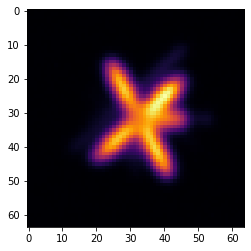

In [39]:
plt.imshow(x_AT.reshape((64, 64)))

In [43]:
xx = Arnoldi_Tikhonov(A, b, L = 'Identity', projection_dim=3, iter= 4, dp_stop = 0, param_choice = 'automatic', automatic_param = 'gcv', reg_param = 1, delta = 0)

generating basis...: 100%|██████████| 3/3 [00:00<00:00, 139.84it/s]

3


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4095)

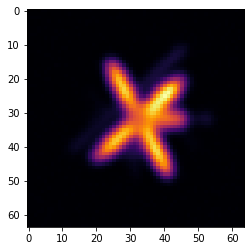

In [42]:
plt.imshow(xx.reshape((64, 64)))

In [46]:
L.shape
HH.shape

(4095, 2)

In [47]:
L = Identity(HH.shape[1]).todense()
reg_param = generalized_crossvalidation(HH, bhat, L)['x'] # find ideal lambda by crossvalidation

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 4095)

In [40]:
def Arnoldi_Tikhonov(A, b, L = 'Identity', projection_dim=3, iter=50, dp_stop = 0, param_choice = 'manual', automatic_param = 'gcv', reg_param = 1, delta = 0, **kwargs):
    if A.shape[0] == A.shape[1]:
        b_vec = b.reshape((-1,1))
        (V,H) = arnoldi(A, b_vec, projection_dim, dp_stop)
        UU = V[:, 0:-1]
        HH = H[0:-1, :]
        bhat = UU.T.dot(b_vec)
        if param_choice == 'manual':
            y = np.linalg.solve(HH.T@HH + reg_param*(Identity(HH.shape[1]).todense()), bhat)
            x_AT = UU.dot(y)
        else:
            if automatic_param == 'gcv':
                L = np.identity(HH.shape[1], dtype='float32')
                reg_param = generalized_crossvalidation(HH, bhat, L, **kwargs)['x'] # find ideal lambda by crossvalidation
            else:
                reg_param = discrepancy_principle(HH, bhat, L, eta = 1.01, noise_norm = delta, **kwargs)['x'][0] # find ideal lambdas by crossvalidation
                L = np.identity(HH.shape[1], dtype='float32')
            y = np.linalg.solve(HH.T*HH + reg_param[0]*L, bhat)
            x_AT = UU.dot(y)
    else:
        raise Warning("The matrix is not square. Arnoldi can not be applied")
    return (x_AT)